In [1]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.8 MB 6.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [2]:
import matplotlib
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from warnings import filterwarnings 
filterwarnings("ignore")
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## **Problem 1: Clustering**

**1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).**

In [3]:
df= pd.read_csv("bank_marketing_part1_Data.csv")

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.shape

(210, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


### **Univariate analysis**

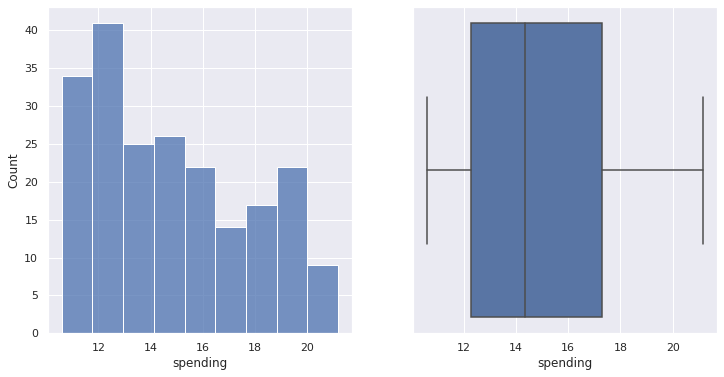

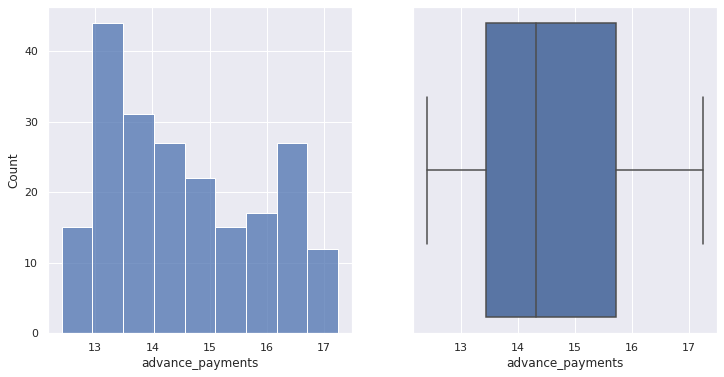

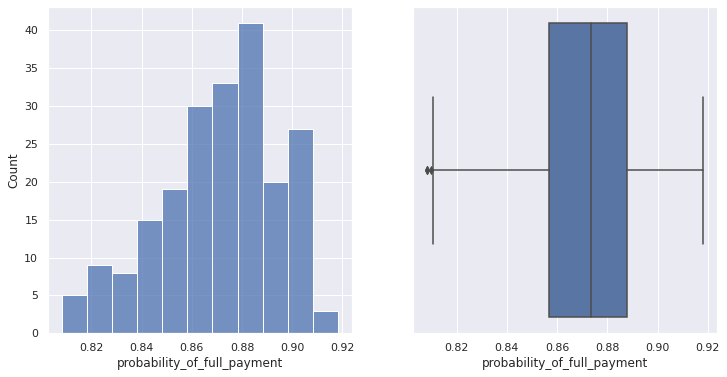

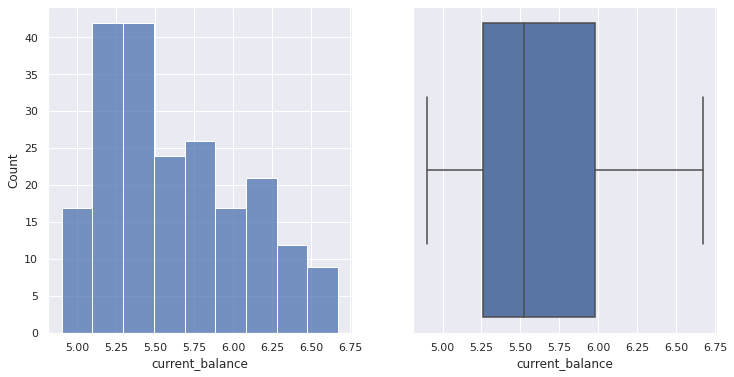

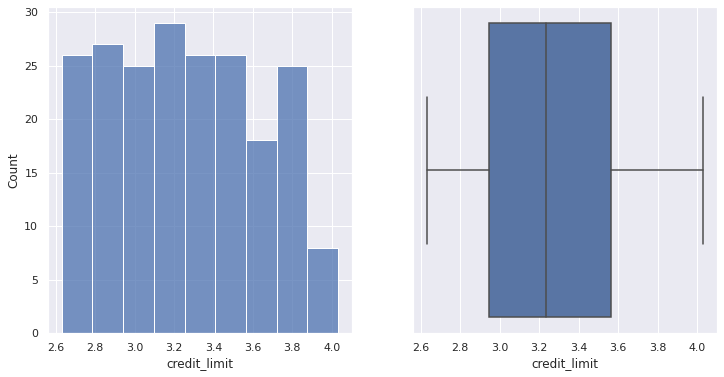

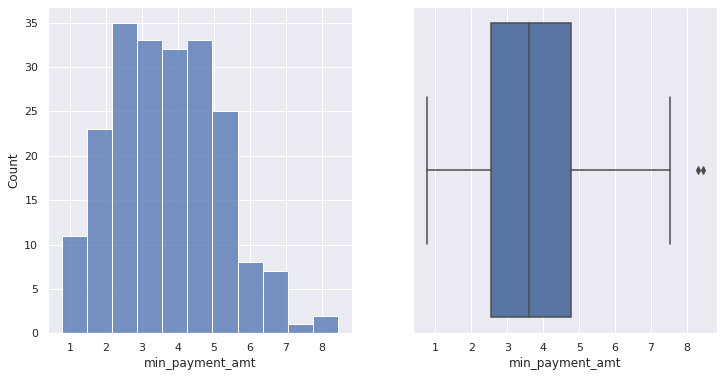

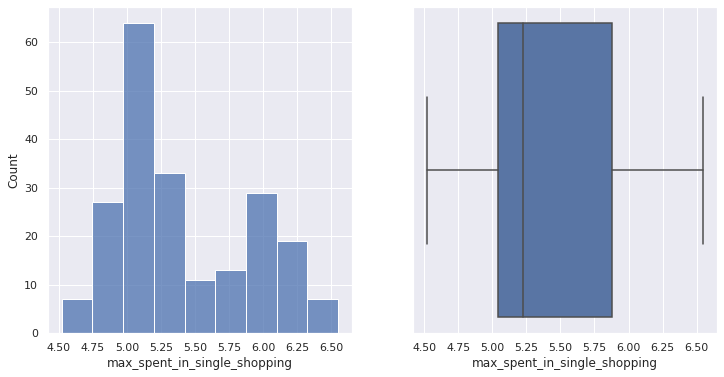

In [10]:
numerical = df.select_dtypes('number').columns
feature_list = df.columns
for i in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    sns.histplot(data=df, x=i, ax=ax[0])
    sns.boxplot(x=i, data=df, width=0.9, ax=ax[1])

In [11]:
from scipy.stats import skew
feature_list = df.columns
for i in range(len(feature_list)):
  print('Skewness({}) is {}'.format((feature_list[i]),round((skew(df)[i]),3)))

Skewness(spending) is 0.397
Skewness(advance_payments) is 0.384
Skewness(probability_of_full_payment) is -0.534
Skewness(current_balance) is 0.522
Skewness(credit_limit) is 0.133
Skewness(min_payment_amt) is 0.399
Skewness(max_spent_in_single_shopping) is 0.558


### **Multivariate analysis**

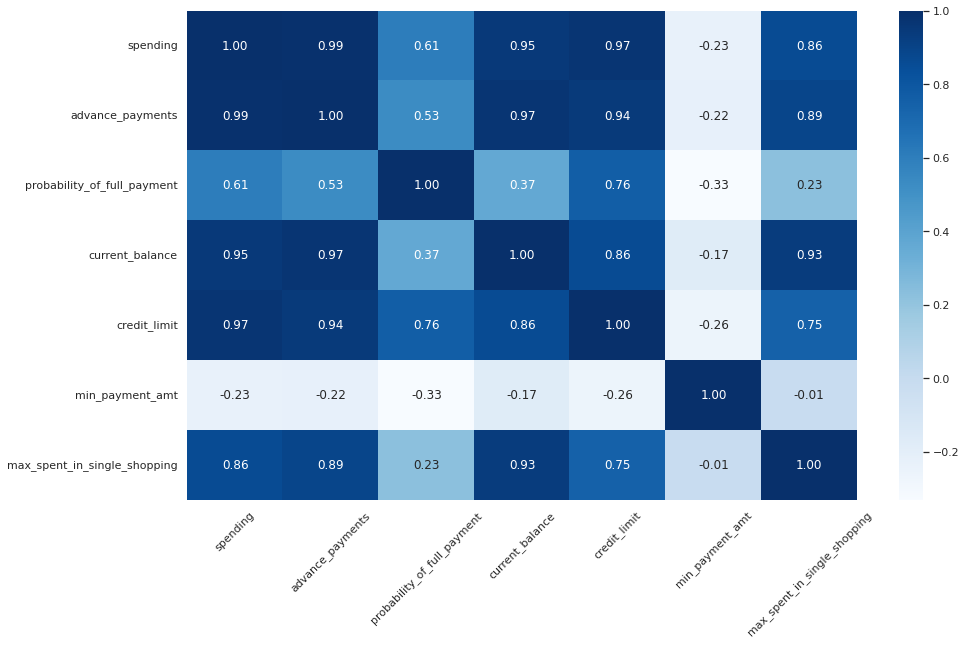

In [12]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.xticks(rotation=45)
plt.show()

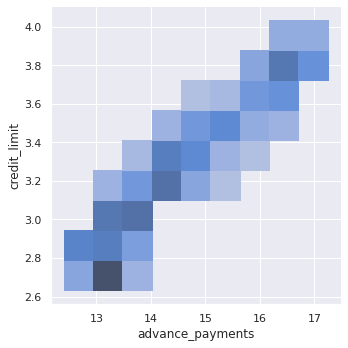

In [13]:
sns.displot(y=df['credit_limit'],x=df['advance_payments'])

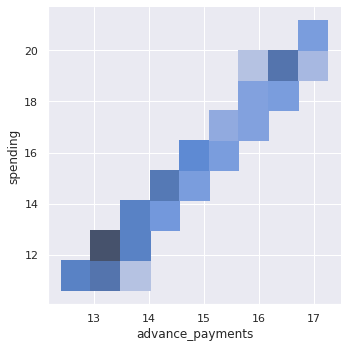

In [14]:
sns.displot(y=df['spending'],x=df['advance_payments'])

<Figure size 288x144 with 0 Axes>

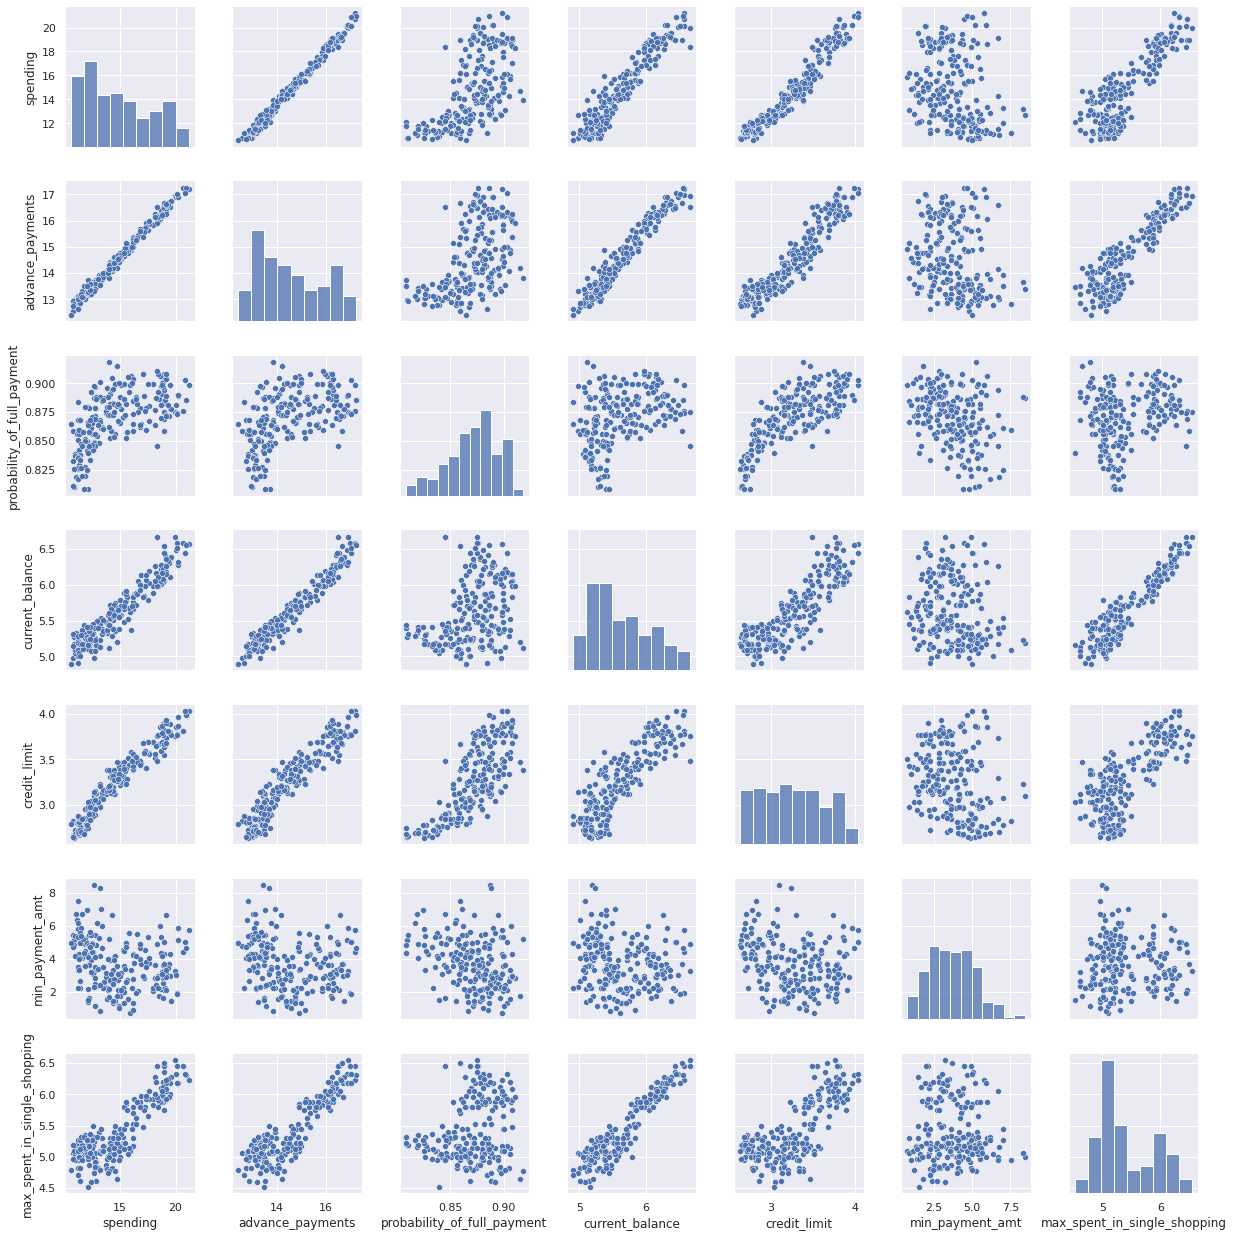

In [15]:
plt.figure(figsize = (4,2))
sns.pairplot(df)

### **Outlier treatment**

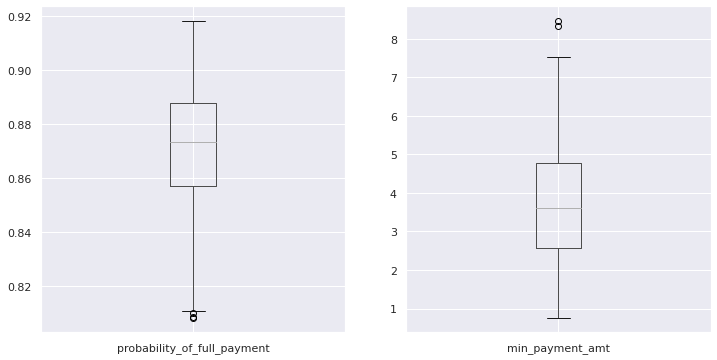

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
df.boxplot(column=['probability_of_full_payment'],  ax=ax[0])
df.boxplot(column=['min_payment_amt'],  ax=ax[1])

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [18]:
lrincome,urincome=remove_outlier(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lrincome,lrincome,df['probability_of_full_payment'])

lrtravel,urtravel=remove_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>urtravel,urtravel,df['min_payment_amt'])

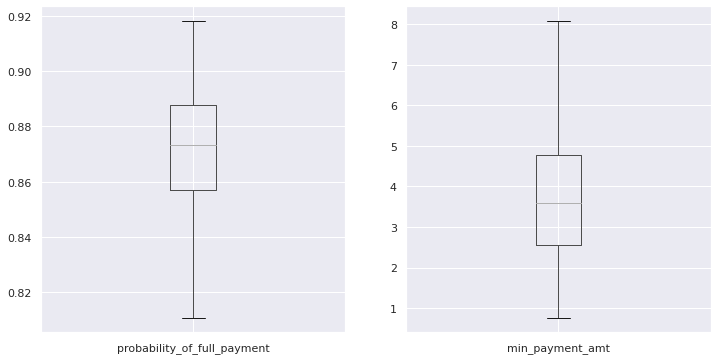

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
df.boxplot(column=['probability_of_full_payment'],  ax=ax[0])
df.boxplot(column=['min_payment_amt'],  ax=ax[1])

### **Do you think scaling is necessary for clustering in this case? Justify**

In [20]:
round(np.var(df),2) #variance  

spending                        8.43
advance_payments                1.70
probability_of_full_payment     0.00
current_balance                 0.20
credit_limit                    0.14
min_payment_amt                 2.22
max_spent_in_single_shopping    0.24
dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler #Scaling
minmax = MinMaxScaler()
df_scaled = minmax.fit_transform(df)
df_scaled

array([[0.8829084 , 0.93181818, 0.59986074, ..., 0.80755524, 0.33999474,
        1.        ],
       [0.50991501, 0.51239669, 0.88952071, ..., 0.67854597, 0.35147874,
        0.30773018],
       [0.78942398, 0.8285124 , 0.67134734, ..., 0.80185317, 0.35585359,
        0.80206795],
       ...,
       [0.32483475, 0.36157025, 0.64071022, ..., 0.40698503, 0.13013832,
        0.23732152],
       [0.52219075, 0.53512397, 0.83010328, ..., 0.60940841, 0.20574132,
        0.4549483 ],
       [0.47025496, 0.5661157 , 0.39097134, ..., 0.42836778, 0.2563256 ,
        0.66962088]])

In [22]:
df_sc = pd.DataFrame(data=df_scaled, columns=df.columns)

In [23]:
round(df_sc.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
spending,210.0,0.40,0.27,0.0,0.16,0.36,0.63,1.0
advance_payments,210.0,0.44,0.27,0.0,0.21,0.39,0.68,1.0
probability_of_full_payment,210.0,0.56,0.22,0.0,0.43,0.58,0.72,1.0
current_balance,210.0,0.41,0.25,0.0,0.20,0.35,0.61,1.0
credit_limit,210.0,0.45,0.27,0.0,0.22,0.43,0.66,1.0
min_payment_amt,210.0,0.40,0.20,0.0,0.25,0.39,0.55,1.0
max_spent_in_single_shopping,210.0,0.44,0.24,0.0,0.26,0.35,0.67,1.0


In [24]:
round(np.var(df_sc),2)

spending                        0.08
advance_payments                0.07
probability_of_full_payment     0.05
current_balance                 0.06
credit_limit                    0.07
min_payment_amt                 0.04
max_spent_in_single_shopping    0.06
dtype: float64

### **Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them**

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
hclust = linkage(df_sc, method = 'ward')

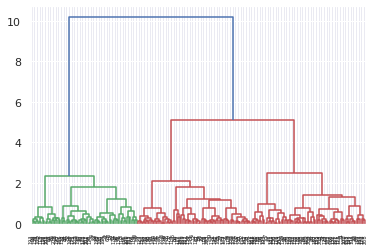

In [27]:
dent = dendrogram(hclust)

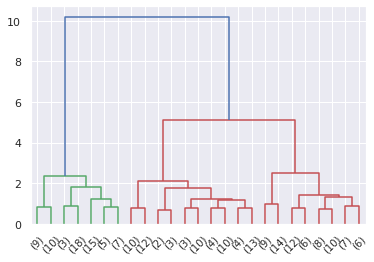

In [28]:
dend = dendrogram(hclust,
                 truncate_mode='lastp',
                 p = 25
                 )

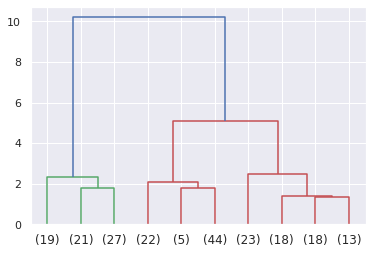

In [29]:
dend = dendrogram(hclust,
                 truncate_mode='lastp',
                 p = 10
                 )

In [30]:
from scipy.cluster.hierarchy import fcluster

In [31]:
clusters = fcluster(hclust, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 2, 1, 3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3], dtype=int32)

In [32]:
clusters1 = fcluster(hclust, 3, criterion='distance')
clusters1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 2, 1, 3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3], dtype=int32)

In [33]:
np.array_equal(clusters,clusters1)

True

In [34]:
df_sc['clusters'] = clusters
round(df_sc.head(), 2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,0.88,0.93,0.60,1.00,0.81,0.34,1.00,1
1,0.51,0.51,0.89,0.26,0.68,0.35,0.31,3
2,0.79,0.83,0.67,0.76,0.80,0.36,0.80,1
3,0.02,0.11,0.00,0.21,0.01,0.60,0.33,2
4,0.70,0.71,0.82,0.56,0.76,0.18,0.65,1


In [35]:
df_sc.clusters.value_counts().sort_index()

1    67
2    71
3    72
Name: clusters, dtype: int64

***Cluster Profiling***

In [36]:
aggdata=df_sc.groupby('clusters').mean()
aggdata['Freq']=df_sc.clusters.value_counts().sort_index()
cdf = round(aggdata,2)
cdf

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,0.74,0.78,0.68,0.72,0.76,0.40,0.75,67
2,0.13,0.19,0.36,0.20,0.17,0.56,0.29,71
3,0.35,0.39,0.65,0.34,0.43,0.24,0.29,72


In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df_sc)
print(Cluster_agglo)

[1 2 1 0 1 0 0 2 1 0 1 2 0 1 2 0 2 0 2 0 0 0 1 0 2 1 2 0 0 0 2 0 0 2 0 0 0
 0 0 1 1 2 1 1 0 0 2 1 1 1 0 1 1 1 1 1 0 0 0 1 2 0 0 2 2 1 1 2 1 2 2 0 1 1
 0 1 2 0 1 2 2 2 2 1 0 2 2 1 1 0 0 1 2 0 2 1 1 1 0 1 0 1 2 1 2 1 1 0 0 1 2
 2 1 0 0 1 2 0 0 1 2 0 0 0 2 2 1 0 2 2 0 2 2 1 0 1 1 0 1 2 0 2 0 0 2 0 1 0
 2 0 2 0 2 2 2 2 2 0 2 1 1 0 1 1 1 0 1 2 2 0 2 0 2 1 1 1 2 0 2 0 2 2 2 2 2
 1 0 2 2 0 2 2 0 1 2 1 1 0 1 0 2 1 2 0 1 2 1 2 2 2]


In [38]:
df_sc["Agglo_CLusters"]=Cluster_agglo
df_sc.Agglo_CLusters.value_counts().sort_index()

0    71
1    67
2    72
Name: Agglo_CLusters, dtype: int64

In [39]:
agglo_data=df_sc.drop(["clusters"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df_sc.Agglo_CLusters.value_counts().sort_index()
round(agglo_data,2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,0.13,0.19,0.36,0.20,0.17,0.56,0.29,71
1,0.74,0.78,0.68,0.72,0.76,0.40,0.75,67
2,0.35,0.39,0.65,0.34,0.43,0.24,0.29,72


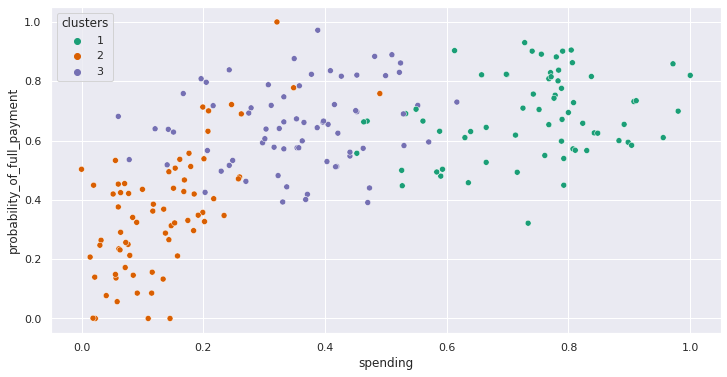

In [40]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df_sc['spending'], y=df_sc['probability_of_full_payment'], hue=df_sc['clusters'], palette='Dark2')
plt.show()

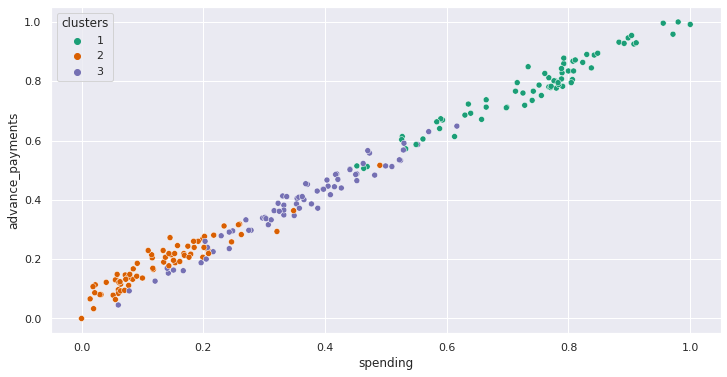

In [41]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df_sc['spending'], y=df_sc['advance_payments'], hue=df_sc['clusters'], palette='Dark2')
plt.show()

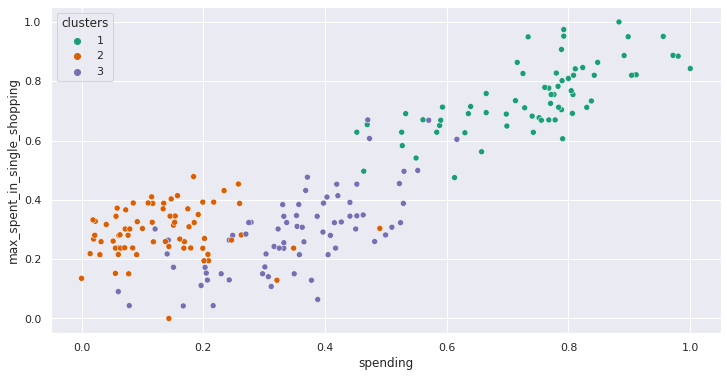

In [42]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df_sc['spending'], y=df_sc['max_spent_in_single_shopping'], hue=df_sc['clusters'], palette='Dark2')
plt.show()

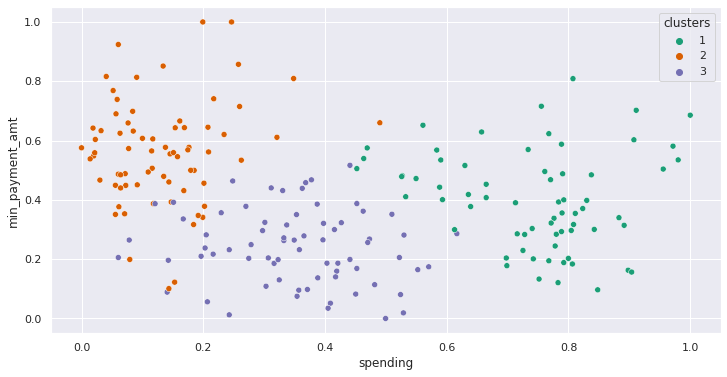

In [43]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df_sc['spending'], y=df_sc['min_payment_amt'], hue=df_sc['clusters'], palette='Dark2')
plt.show()

**Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.**

In [44]:
df_scaled

array([[0.8829084 , 0.93181818, 0.59986074, ..., 0.80755524, 0.33999474,
        1.        ],
       [0.50991501, 0.51239669, 0.88952071, ..., 0.67854597, 0.35147874,
        0.30773018],
       [0.78942398, 0.8285124 , 0.67134734, ..., 0.80185317, 0.35585359,
        0.80206795],
       ...,
       [0.32483475, 0.36157025, 0.64071022, ..., 0.40698503, 0.13013832,
        0.23732152],
       [0.52219075, 0.53512397, 0.83010328, ..., 0.60940841, 0.20574132,
        0.4549483 ],
       [0.47025496, 0.5661157 , 0.39097134, ..., 0.42836778, 0.2563256 ,
        0.66962088]])

**K_Mean process**

In [45]:
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 3,random_state=123)

In [46]:
k_means.fit(df_scaled)

KMeans(n_clusters=3, random_state=123)

In [47]:
k_means.labels_

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0], dtype=int32)

In [48]:
k_means.inertia_

22.770013026036565

In [49]:
for i in range(2,11):
  k_means = KMeans(n_clusters = i,random_state=123)
  k_means.fit(df_scaled)
  print('K={} k_mean inertia is {}'.format(i, k_means.inertia_))

K=2 k_mean inertia is 35.86521074048986
K=3 k_mean inertia is 22.770013026036565
K=4 k_mean inertia is 19.323702051792594
K=5 k_mean inertia is 16.805267418372438
K=6 k_mean inertia is 15.034100489090957
K=7 k_mean inertia is 13.572375596448449
K=8 k_mean inertia is 12.40849585460089
K=9 k_mean inertia is 11.562122716886622
K=10 k_mean inertia is 10.637735649109779


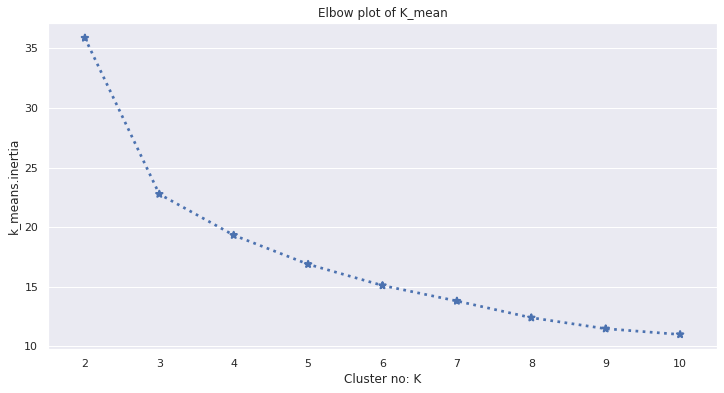

In [50]:
wss =[] 
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)
a=[2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.pointplot(a, wss, markers='*', linestyles=':')
plt.title('Elbow plot of K_mean')
plt.xlabel('Cluster no: K')
plt.ylabel('k_means.inertia')
plt.show()

**silhouette score**

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score
for i in range(2,11):
  k_means = KMeans(n_clusters = i,random_state=123)
  k_means.fit(df_scaled)
  labels = k_means.labels_
  score = silhouette_score(df_scaled, labels ,random_state=123)
  print('K={} silhouette_score is {}'.format(i, score))

K=2 silhouette_score is 0.5000644323521964
K=3 silhouette_score is 0.41888372435617
K=4 silhouette_score is 0.336795122525894
K=5 silhouette_score is 0.2984344704377303
K=6 silhouette_score is 0.29779380363831776
K=7 silhouette_score is 0.2867697986929532
K=8 silhouette_score is 0.25876344641452964
K=9 silhouette_score is 0.24730313425745734
K=10 silhouette_score is 0.26616816174579233


**Cluster number = 3**

In [52]:
k_means = KMeans(n_clusters = 3,random_state=123)
k_means.fit(df_scaled)
labels = k_means.labels_

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(df_scaled,labels,random_state=123)

0.41888372435617

**Append cluster labels from K-means into the original data**

In [54]:
df["KMCluster"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,KMCluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


**Cluster Frequence**

In [55]:
df.KMCluster.value_counts().sort_index()

0    69
1    64
2    77
Name: KMCluster, dtype: int64

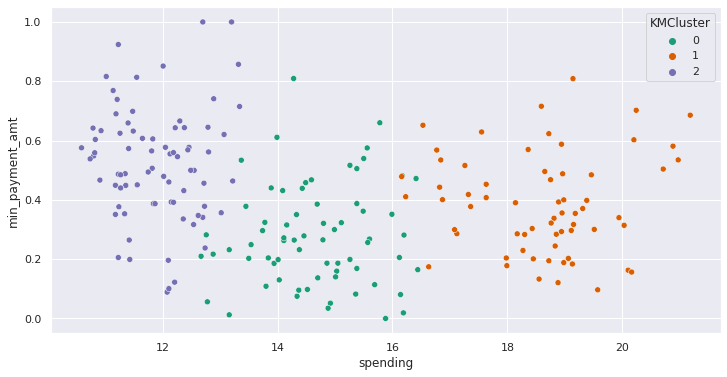

In [56]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df['spending'], y=df_sc['min_payment_amt'], hue=df['KMCluster'], palette='Dark2')
plt.show()

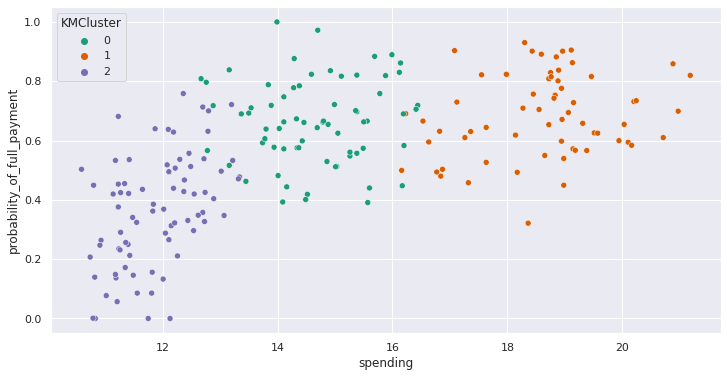

In [57]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df['spending'], y=df_sc['probability_of_full_payment'], hue=df['KMCluster'], palette='Dark2')
plt.show()

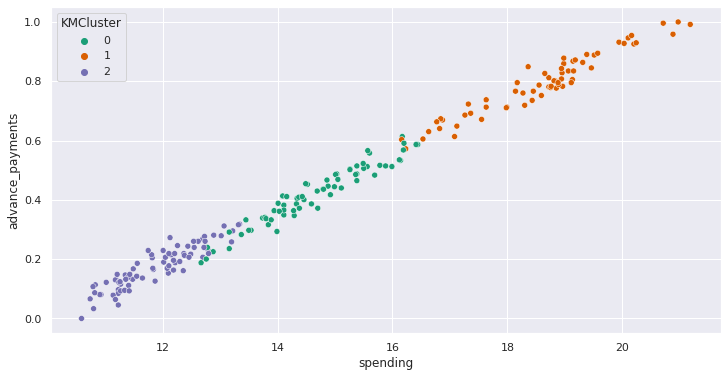

In [58]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df['spending'], y=df_sc['advance_payments'], hue=df['KMCluster'], palette='Dark2')
plt.show()

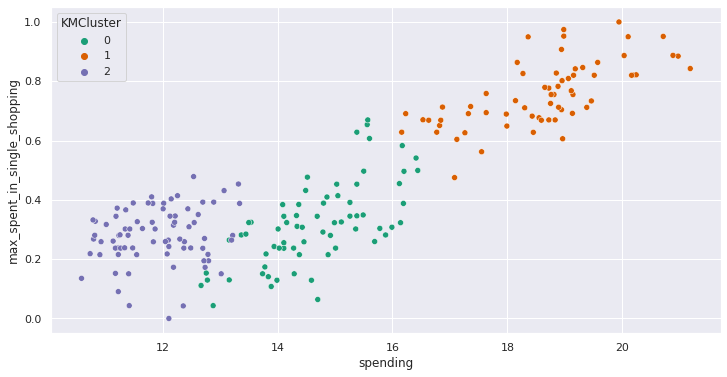

In [59]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df['spending'], y=df_sc['max_spent_in_single_shopping'], hue=df['KMCluster'], palette='Dark2')
plt.show()

**Cluster Profiling**

In [60]:
clust_profile=df
clust_profile=clust_profile.groupby('KMCluster').mean()
clust_profile['freq']=df.KMCluster.value_counts().sort_index()
round(clust_profile, 2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
KMCluster,,,,,,,,
0,14.65,14.44,0.88,5.55,3.29,2.80,5.17,69
1,18.61,16.25,0.88,6.20,3.71,3.59,6.06,64
2,11.90,13.26,0.85,5.23,2.86,4.59,5.09,77


### **Problem 2: CART-RF-ANN**

**2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).**

In [268]:
df= pd.read_csv("insurance_part2_data.csv")

In [269]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [270]:
df.shape

(3000, 10)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [235]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [206]:
df.describe(include='object').T

,count,unique,top,freq
Agency_Code,3000,4,EPX,1365
Type,3000,2,Travel Agency,1837
Claimed,3000,2,No,2076
Channel,3000,2,Online,2954
Product Name,3000,5,Customised Plan,1136
Destination,3000,3,ASIA,2465


In [207]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [208]:
df.duplicated().sum()

139

**Checking duplicates**

In [271]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [272]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [273]:
df.shape

(2861, 10)

**Outliers for continuous**

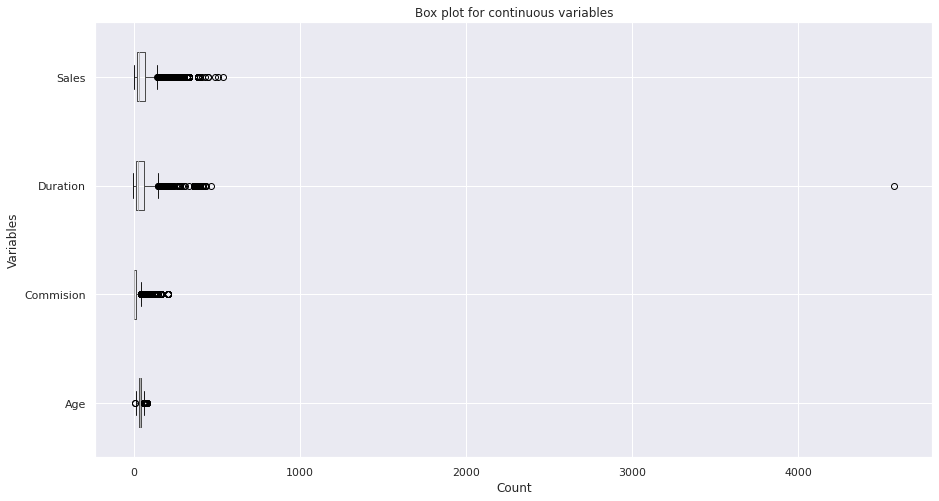

In [212]:
plt.figure(figsize=(15,8))
df[['Age', 'Commision', 'Duration', 'Sales']].boxplot(vert=0)
plt.title('Box plot for continuous variables')
plt.xlabel('Count')
plt.ylabel('Variables')
plt.show()

In [213]:
for column in df[[ 'Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     471
C2B     913
EPX    1238
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1152
Travel Agency    1709
Name: Type, dtype: int64


CLAIMED :  2
Yes     914
No     1947
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2815
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           421
Cancellation Plan     615
Bronze Plan           645
Customised Plan      1071
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     319
ASIA        2327
Name: Destination, dtype: int64




In [214]:
df['Claimed'].value_counts(normalize=True)

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64

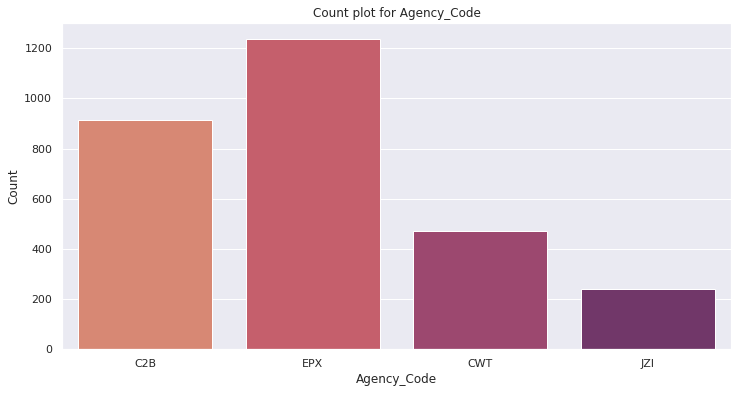

In [215]:
plt.figure(figsize=(12,6))
sns.countplot(df['Agency_Code'], palette='flare')
plt.title('Count plot for Agency_Code')
plt.xlabel('Agency_Code')
plt.ylabel('Count')
plt.show()

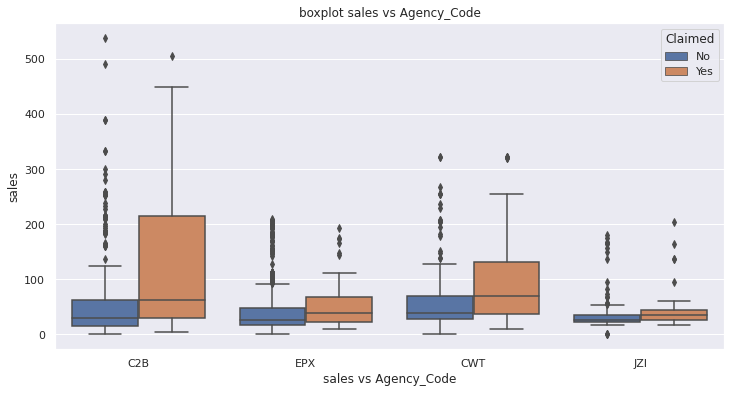

In [216]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['Sales'], x=df['Agency_Code'], hue=df['Claimed'])
plt.title('boxplot sales vs Agency_Code')
plt.xlabel('sales vs Agency_Code')
plt.ylabel('sales')
plt.show()

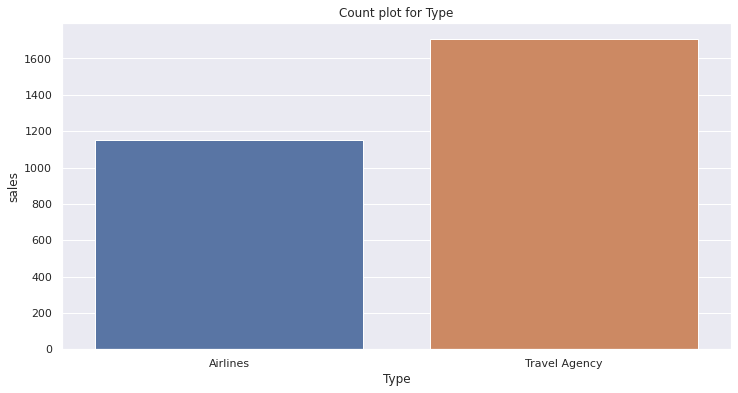

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(df['Type'])
plt.title('Count plot for Type')
plt.xlabel('Type')
plt.ylabel('sales')
plt.show()

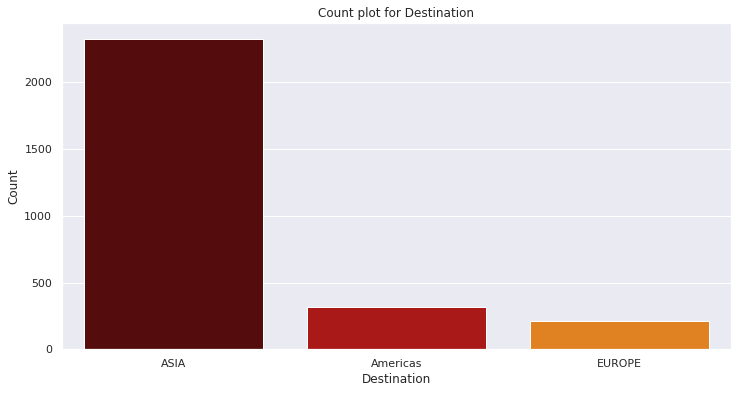

In [78]:
plt.figure(figsize=(12,6))
sns.countplot(df['Destination'], palette='gist_heat')
plt.title('Count plot for Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()

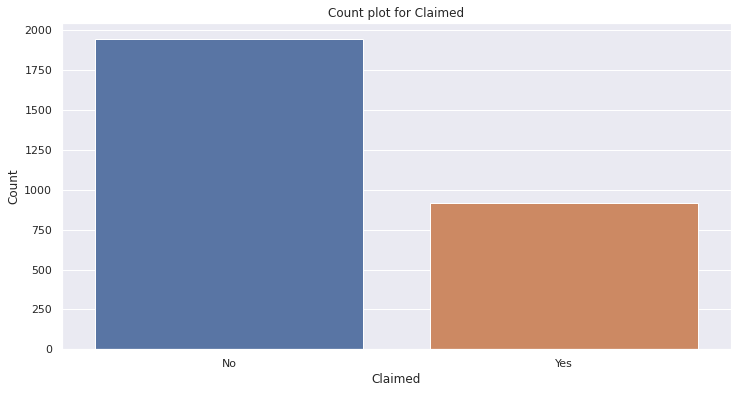

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(df['Claimed'])
plt.title('Count plot for Claimed')
plt.xlabel('Claimed')
plt.ylabel('Count')
plt.show()

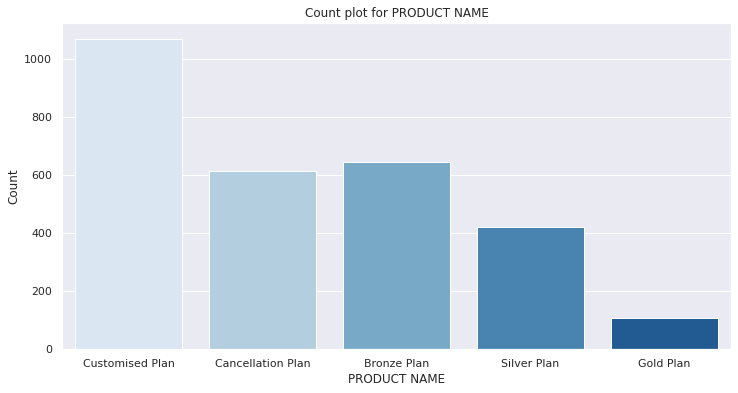

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(df['Product Name'], palette='Blues')
plt.title('Count plot for PRODUCT NAME')
plt.xlabel('PRODUCT NAME')
plt.ylabel('Count')
plt.show()

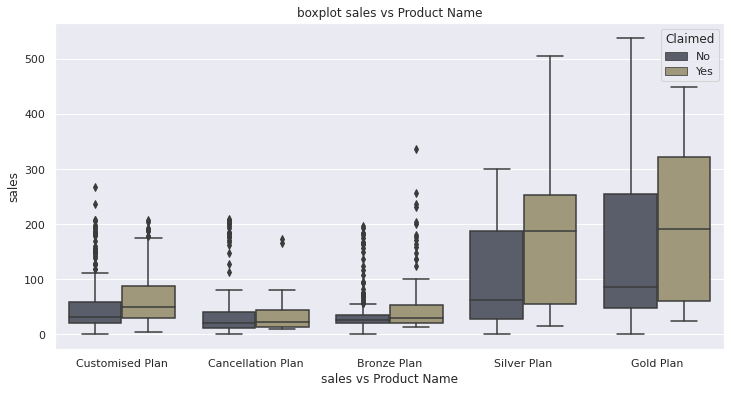

In [81]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['Sales'], x=df['Product Name'], hue=df['Claimed'], palette='cividis')
plt.title('boxplot sales vs Product Name')
plt.xlabel('sales vs Product Name')
plt.ylabel('sales')
plt.show()

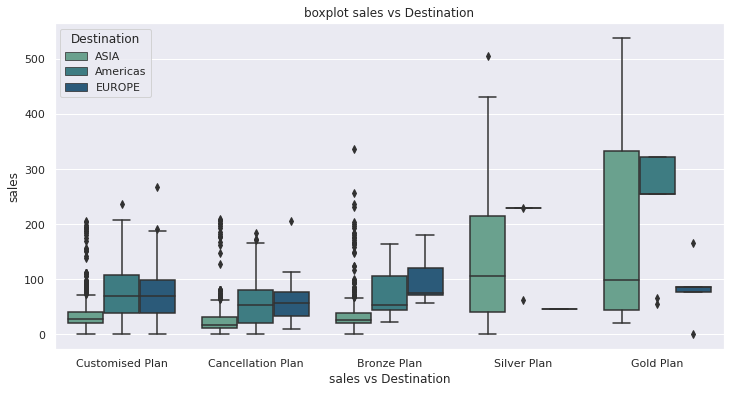

In [82]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['Sales'], x=df['Product Name'], hue=df['Destination'], palette='crest')
plt.title('boxplot sales vs Destination')
plt.xlabel('sales vs Destination')
plt.ylabel('sales')
plt.show()

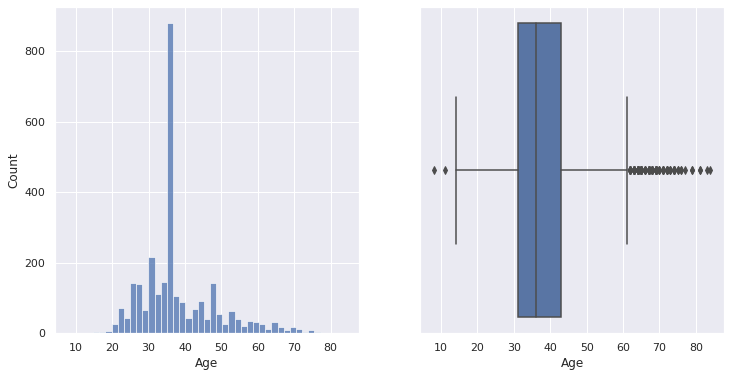

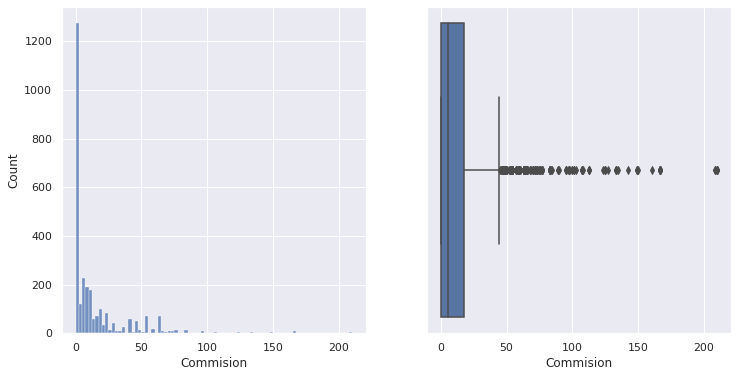

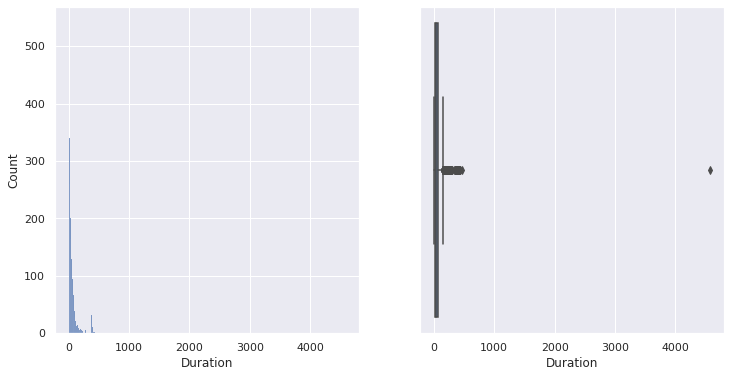

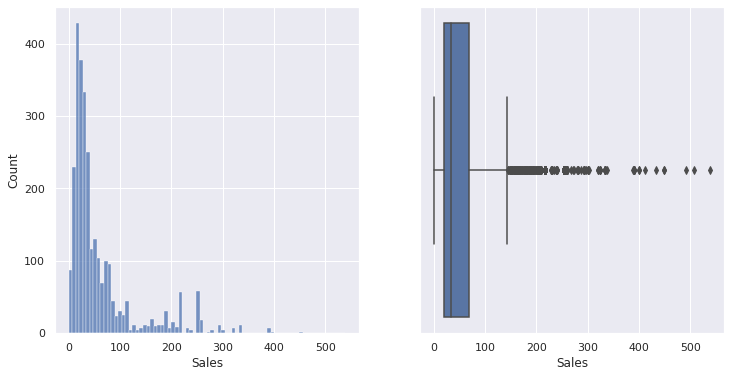

In [83]:
numerical = df.select_dtypes('number').columns
feature_list = df.columns
for i in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    sns.histplot(data=df, x=i, ax=ax[0])
    sns.boxplot(x=i, data=df, width=0.9, ax=ax[1])

In [274]:
df['Duration'] = df['Duration'].replace(to_replace =-1, value = 1)
df['Duration'] = df['Duration'].replace(to_replace =0, value = 1)
df[df['Duration']<=0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [275]:
df[df['Duration']>450]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA
2914,64,CWT,Travel Agency,No,90.09,Online,466,138.60,Silver Plan,ASIA


In [276]:
df['Duration'] = df['Duration'].replace(to_replace =4580, value = 466)

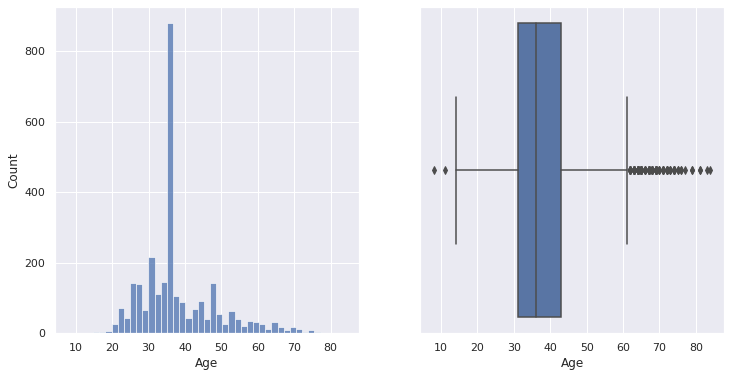

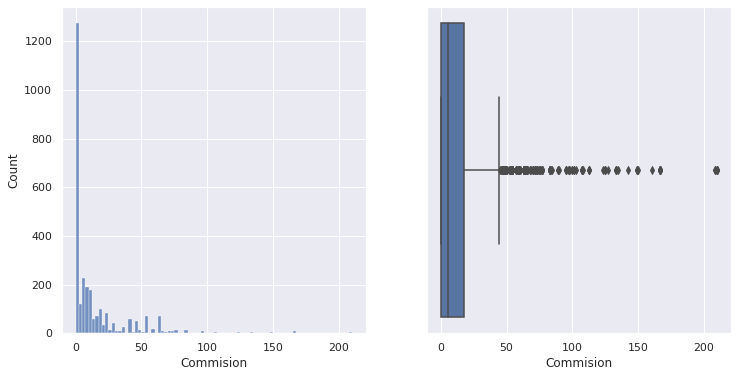

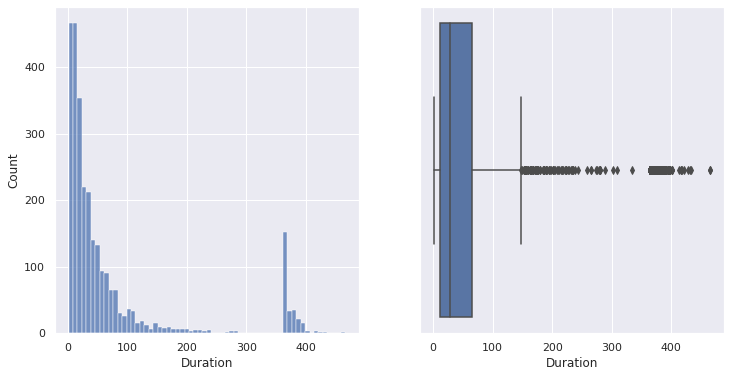

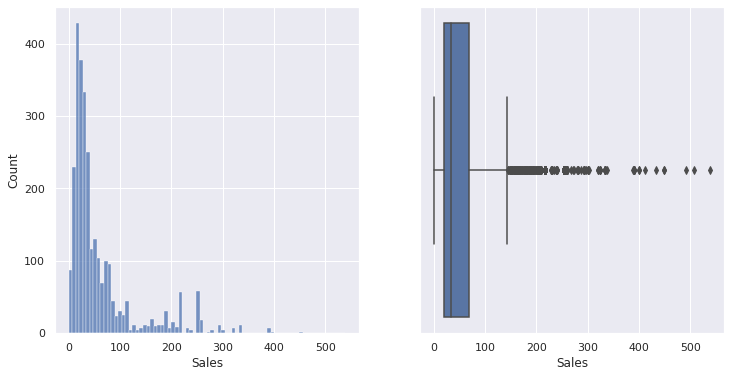

In [87]:
numerical = df.select_dtypes('number').columns
feature_list = df.columns
for i in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    sns.histplot(data=df, x=i, ax=ax[0])
    sns.boxplot(x=i, data=df, width=0.9, ax=ax[1])

In [277]:
numerical = df.select_dtypes('number').columns
skew(df[numerical]).round(3)

array([1.103, 3.103, 2.19 , 2.343])

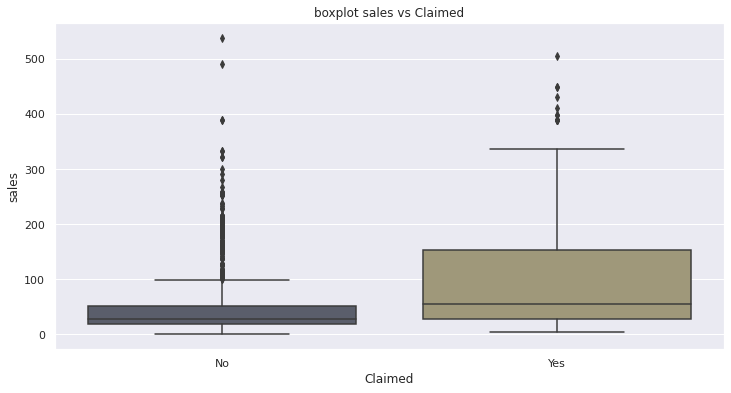

In [89]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['Sales'], x=df['Claimed'], palette='cividis')
plt.title('boxplot sales vs Claimed')
plt.xlabel('Claimed')
plt.ylabel('sales')
plt.show()

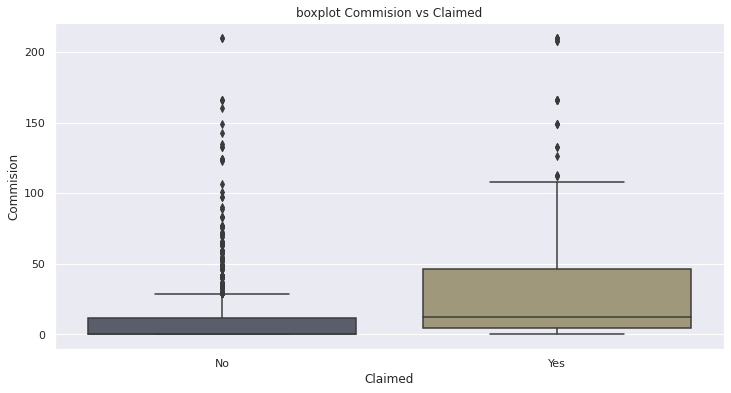

In [241]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['Commision'], x=df['Claimed'], palette='cividis')
plt.title('boxplot Commision vs Claimed')
plt.xlabel('Claimed')
plt.ylabel('Commision')
plt.show()

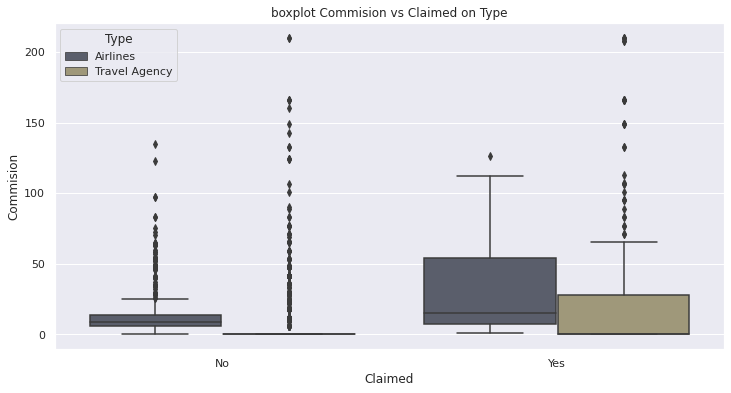

In [248]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['Commision'], x=df['Claimed'], hue=df['Type'], palette='cividis')
plt.title('boxplot Commision vs Claimed on Type')
plt.xlabel('Claimed')
plt.ylabel('Commision')
plt.show()

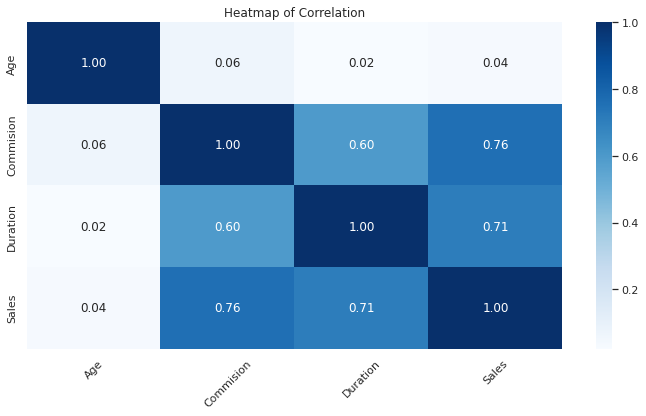

In [278]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.xticks(rotation=45)
plt.title('Heatmap of Correlation')
plt.show()

<Figure size 1008x576 with 0 Axes>

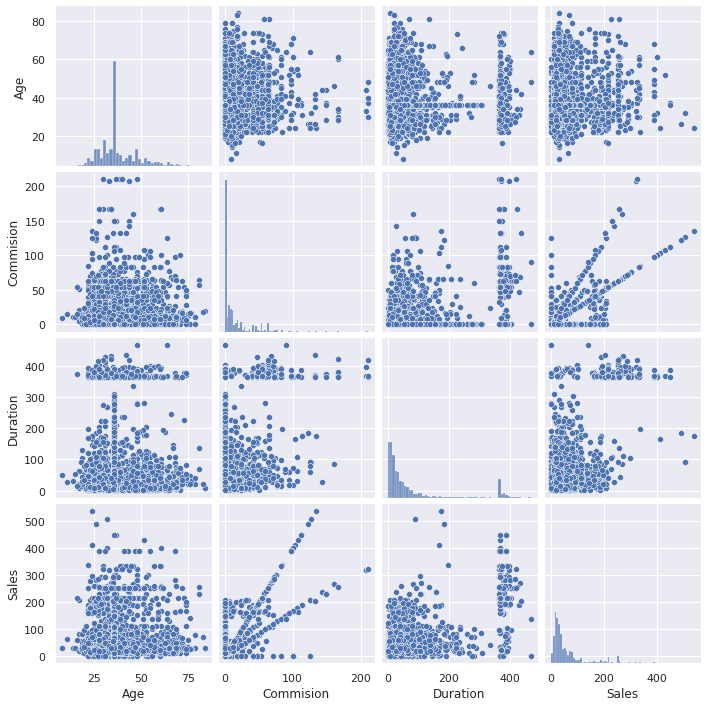

In [92]:
plt.figure(figsize = (14,8))
sns.pairplot(df)

**Object convert to code**

In [279]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes    



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan',
                         'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


In [281]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [282]:
round(df['Claimed'].value_counts(normalize=True)*100, 2)

0    68.05
1    31.95
Name: Claimed, dtype: float64

**Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network**

**Extracting the target for training set and test set**

In [283]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=123)

In [285]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [286]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=123)

In [287]:
dtree.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=123)

In [102]:
print (pd.DataFrame(dtree.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending=False))

              Importance
Duration        0.273646
Sales           0.210878
Agency_Code     0.179736
Age             0.167237
Commision       0.091713
Product Name    0.049420
Destination     0.023208
Channel         0.004161
Type            0.000000


In [103]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(dtree, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [104]:
ytest_predict =  dtree.predict(X_test)
ytrain_predict = dtree.predict(X_train)

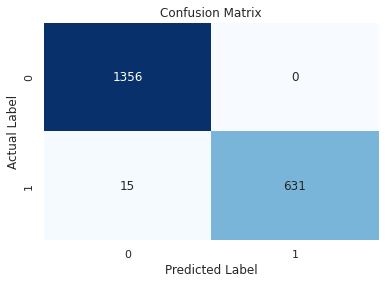

In [105]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [106]:
cart_train_acc=dtree.score(X_train,train_labels)
cart_train_acc

0.9925074925074925

In [107]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       1.00      0.98      0.99       646

    accuracy                           0.99      2002
   macro avg       0.99      0.99      0.99      2002
weighted avg       0.99      0.99      0.99      2002



AUC: 1.000


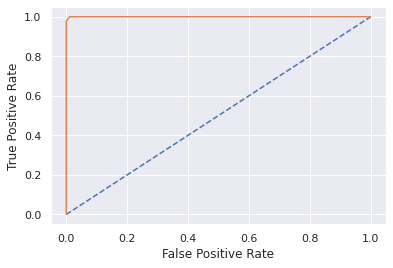

In [108]:
# predict probabilities
probs = dtree.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [109]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f12=round(df.loc["1"][2],2)
cart_train_recall2=round(df.loc["1"][1],2)
cart_train_precision2=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision2)
print ('cart_train_recall ',cart_train_recall2)
print ('cart_train_f1 ',cart_train_f12)

cart_train_precision  1.0
cart_train_recall  0.98
cart_train_f1  0.99


**Test**

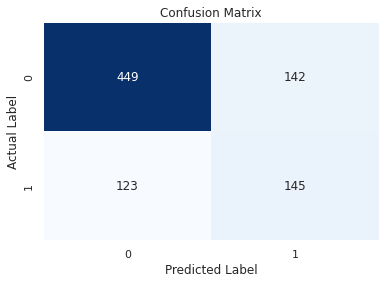

In [110]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [111]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       591
           1       0.51      0.54      0.52       268

    accuracy                           0.69       859
   macro avg       0.65      0.65      0.65       859
weighted avg       0.70      0.69      0.69       859



In [112]:
cart_test_acc=dtree.score(X_test,test_labels)
cart_test_acc

0.6915017462165308

AUC: 0.651


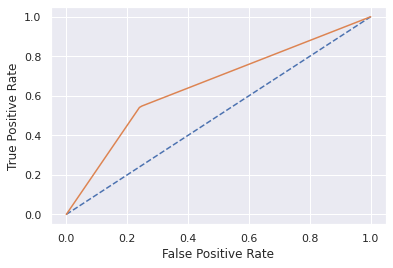

In [113]:
# predict probabilities
probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [114]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision2=round(df.loc["1"][0],2)
cart_test_recall2=round(df.loc["1"][1],2)
cart_test_f12=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision2)
print ('cart_test_recall ',cart_test_recall2)
print ('cart_test_f1 ',cart_test_f12)

cart_test_precision  0.51
cart_test_recall  0.54
cart_test_f1  0.52


**Grid Search**

In [115]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [4, 5, 7, 8, 10],
    'min_samples_leaf': [20, 35], 
    'min_samples_split': [200, 300, 400],
}

dtcl = DecisionTreeClassifier(random_state=123)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5)

In [116]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 200}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=200,
                       random_state=123)

In [117]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized2.dot','w')
dot_data = tree.export_graphviz(dtree, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

**Variable IMP**

In [118]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending=False))

              Importance
Agency_Code     0.587848
Sales           0.219399
Product Name    0.109473
Age             0.032647
Duration        0.021835
Commision       0.020183
Destination     0.008615
Type            0.000000
Channel         0.000000


**Confusion Matrix**

In [119]:
# Predict both the train and test data
ytest_predict =  best_grid.predict(X_test)
ytrain_predict = best_grid.predict(X_train)

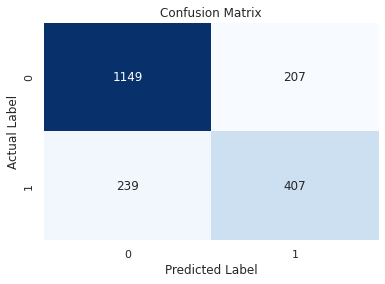

In [120]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [121]:
cart_train_acc=best_grid.score(X_train,train_labels)
cart_train_acc

0.7772227772227772

In [122]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1356
           1       0.66      0.63      0.65       646

    accuracy                           0.78      2002
   macro avg       0.75      0.74      0.74      2002
weighted avg       0.77      0.78      0.78      2002



AUC: 0.822


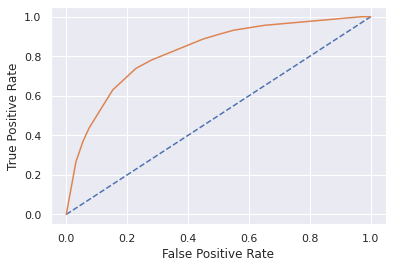

In [123]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [124]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.66
cart_train_recall  0.63
cart_train_f1  0.65


**Test**

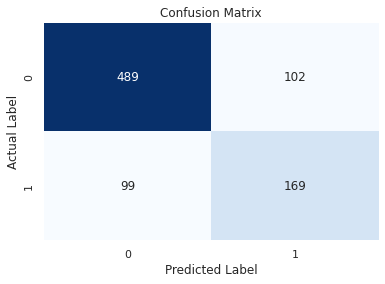

In [125]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [126]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7660069848661234

In [127]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       591
           1       0.62      0.63      0.63       268

    accuracy                           0.77       859
   macro avg       0.73      0.73      0.73       859
weighted avg       0.77      0.77      0.77       859



AUC: 0.783


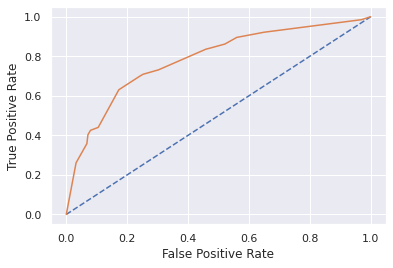

In [128]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [129]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.62
cart_test_recall  0.63
cart_test_f1  0.63


**Random Forest**

In [130]:
rf = RandomForestClassifier(random_state=123, )

In [131]:
rf.fit(X_train, train_labels)

RandomForestClassifier(random_state=123)

In [132]:
print (pd.DataFrame(rf.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending=False))

              Importance
Duration        0.262404
Sales           0.203511
Age             0.172830
Commision       0.121100
Agency_Code     0.100321
Product Name    0.095428
Destination     0.022865
Type            0.014934
Channel         0.006606


In [133]:
ytrain_predict = rf.predict(X_train)
ytest_predict = rf.predict(X_test)

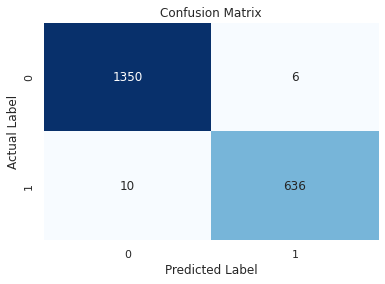

In [134]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [135]:
rf_train_acc=rf.score(X_train,train_labels) 
rf_train_acc

0.9920079920079921

In [136]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.99      0.98      0.99       646

    accuracy                           0.99      2002
   macro avg       0.99      0.99      0.99      2002
weighted avg       0.99      0.99      0.99      2002



Area under Curve is 0.9998561604427518


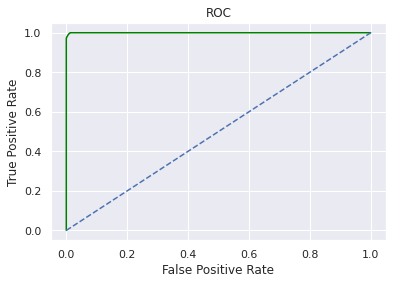

In [137]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,rf.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,rf.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [138]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision2=round(df.loc["1"][0],2)
rf_train_recall2=round(df.loc["1"][1],2)
rf_train_f12=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision2)
print ('rf_train_recall ',rf_train_recall2)
print ('rf_train_f1 ',rf_train_f12)

rf_train_precision  0.99
rf_train_recall  0.98
rf_train_f1  0.99


**Test**

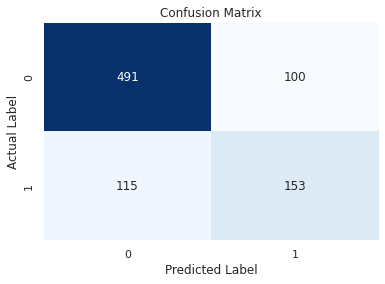

In [139]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [140]:
rf_test_acc=rf.score(X_test,test_labels)
rf_test_acc

0.7497089639115251

In [141]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       591
           1       0.60      0.57      0.59       268

    accuracy                           0.75       859
   macro avg       0.71      0.70      0.70       859
weighted avg       0.75      0.75      0.75       859



Area under Curve is 0.7747935449655277


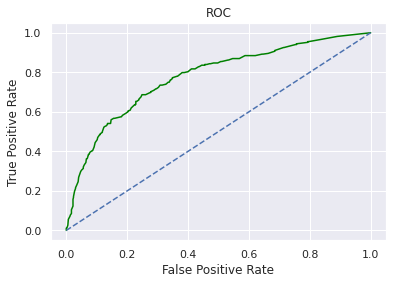

In [142]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,rf.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,rf.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [143]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision2=round(df.loc["1"][0],2)
rf_test_recall2=round(df.loc["1"][1],2)
rf_test_f12=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision2)
print ('rf_test_recall ',rf_test_recall2)
print ('rf_test_f1 ',rf_test_f12)

rf_test_precision  0.6
rf_test_recall  0.57
rf_test_f1  0.59


### **Grid Search**

In [144]:
param_grid = {
    'max_depth': [5, 10, 20, 30], 
    'max_features': [5, 6, 7],
    'min_samples_leaf': [40, 50, 70],
    'min_samples_split': [20, 30, 40], 
    'n_estimators': [50, 100, 200, 300] 
}

rfcl = RandomForestClassifier(random_state=123)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [145]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'max_features': [5, 6, 7],
                         'min_samples_leaf': [40, 50, 70],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 100, 200, 300]})

In [146]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 50, 'min_samples_split': 20, 'n_estimators': 50}


RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=50,
                       min_samples_split=20, n_estimators=50, random_state=123)

In [147]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

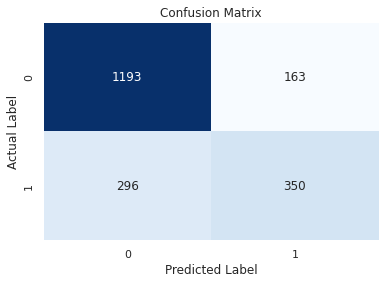

In [148]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [149]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7707292707292708

In [150]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1356
           1       0.68      0.54      0.60       646

    accuracy                           0.77      2002
   macro avg       0.74      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002



Area under Curve is 0.8298024146780276


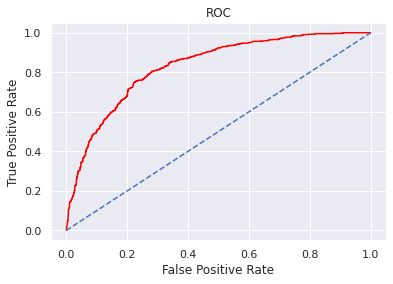

In [151]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [152]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.68
rf_train_recall  0.54
rf_train_f1  0.6


**Test**

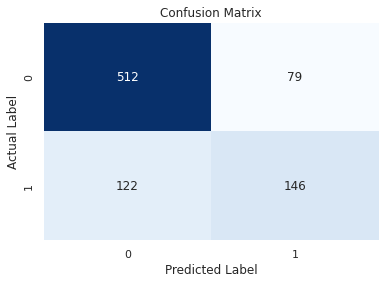

In [153]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [154]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7660069848661234

In [155]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       591
           1       0.65      0.54      0.59       268

    accuracy                           0.77       859
   macro avg       0.73      0.71      0.71       859
weighted avg       0.76      0.77      0.76       859



Area under Curve is 0.8018284213450514


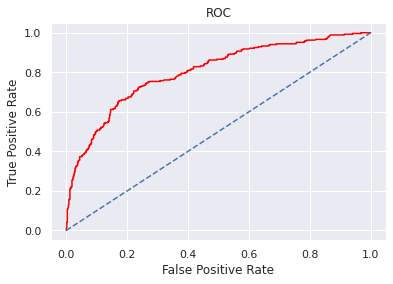

In [156]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [157]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.65
rf_test_recall  0.54
rf_test_f1  0.59


**Variable Importance**

In [158]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.416913
Product Name  0.256784
Sales         0.169993
Commision     0.062347
Duration      0.042298
Age           0.024639
Type          0.022198
Destination   0.004829
Channel       0.000000


**Neural Network Classifier**

In [288]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [289]:
ann  = MLPClassifier(random_state=123, )

In [290]:
ann.fit(X_train, train_labels)

MLPClassifier(random_state=123)

In [291]:
ytrain_predict = ann.predict(X_train)
ytest_predict = ann.predict(X_test)

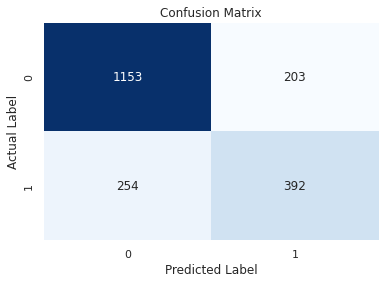

In [292]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [164]:
nn_train_acc=ann.score(X_train,train_labels) 
nn_train_acc

0.7717282717282717

In [165]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1356
           1       0.66      0.61      0.63       646

    accuracy                           0.77      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.77      0.77      0.77      2002



Area under Curve is 0.8174556152223347


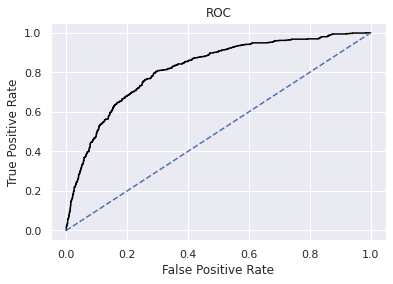

In [166]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,ann.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,ann.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [167]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision2=round(df.loc["1"][0],2)
nn_train_recall2=round(df.loc["1"][1],2)
nn_train_f12=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision2)
print ('nn_train_recall ',nn_train_recall2)
print ('nn_train_f1 ',nn_train_f12)

nn_train_precision  0.66
nn_train_recall  0.61
nn_train_f1  0.63


**ANN test**

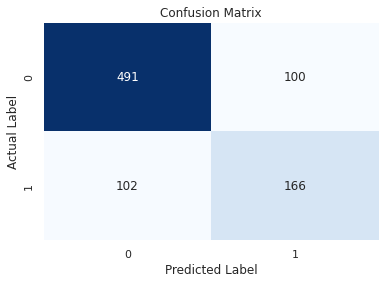

In [168]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [169]:
nn_train_acc=ann.score(X_test,test_labels) 
nn_train_acc

0.7648428405122235

In [170]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       591
           1       0.62      0.62      0.62       268

    accuracy                           0.76       859
   macro avg       0.73      0.73      0.73       859
weighted avg       0.76      0.76      0.76       859



Area under Curve is 0.7996502260272242


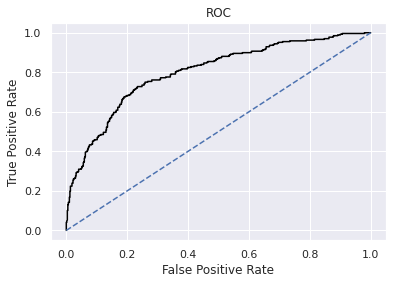

In [171]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,ann.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,ann.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [172]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision2=round(df.loc["1"][0],2)
nn_test_recall2=round(df.loc["1"][1],2)
nn_test_f12=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision2)
print ('nn_test_recall ',nn_test_recall2)
print ('nn_test_f1 ',nn_test_f12)

nn_test_precision  0.62
nn_test_recall  0.62
nn_test_f1  0.62


**Grid Search**

In [297]:
param_grid = {
    'hidden_layer_sizes': [50, 100, 200], 
    'max_iter': [2500, 5000, 7000], 
    'solver': ['adam', 'sgd'],
    'tol': [0.1, 0.01], 
}

nncl = MLPClassifier(random_state=123)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [298]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [300]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=123, tol=0.01)

In [296]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

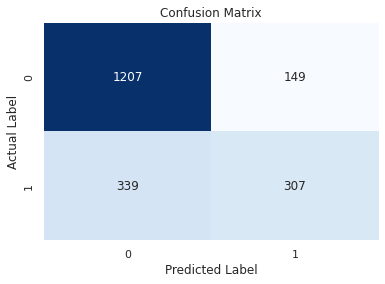

In [301]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [302]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7562437562437563

In [304]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1356
           1       0.67      0.48      0.56       646

    accuracy                           0.76      2002
   macro avg       0.73      0.68      0.69      2002
weighted avg       0.75      0.76      0.74      2002



Area under Curve is 0.7987416321908363


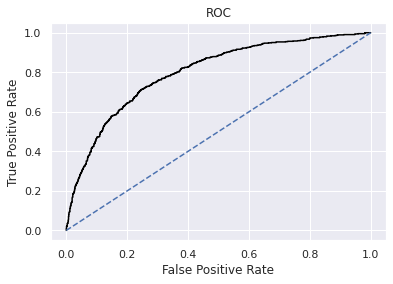

In [306]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [307]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.48
nn_train_f1  0.56


**Test**

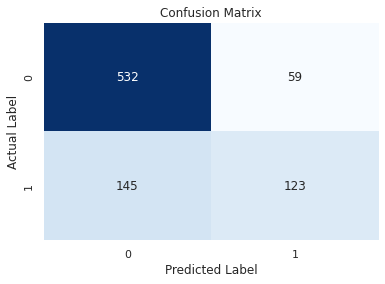

In [182]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [309]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7543655413271245

In [310]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       591
           1       0.64      0.48      0.55       268

    accuracy                           0.75       859
   macro avg       0.72      0.68      0.69       859
weighted avg       0.74      0.75      0.74       859



Area under Curve is 0.7897631133671742


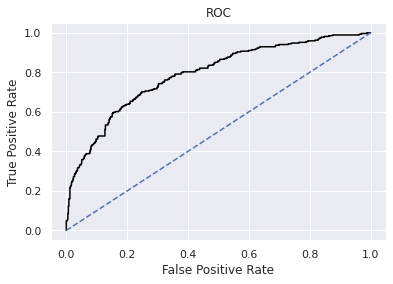

In [314]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [312]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.64
nn_test_recall  0.48
nn_test_f1  0.55


**Compare**

In [313]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.77,0.77,0.77,0.76,0.75
AUC,0.82,0.78,0.83,0.80,0.80,0.79
Recall,0.63,0.63,0.54,0.54,0.48,0.48
Precision,0.66,0.62,0.68,0.65,0.67,0.64
F1 Score,0.65,0.63,0.60,0.59,0.56,0.55


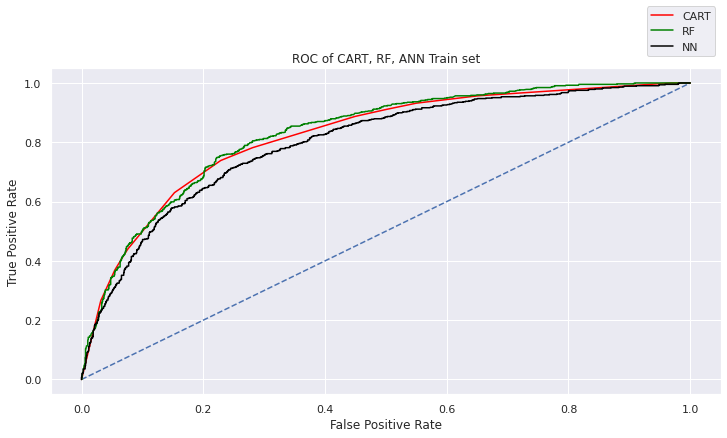

In [315]:
plt.figure(figsize=(12,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of CART, RF, ANN Train set')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

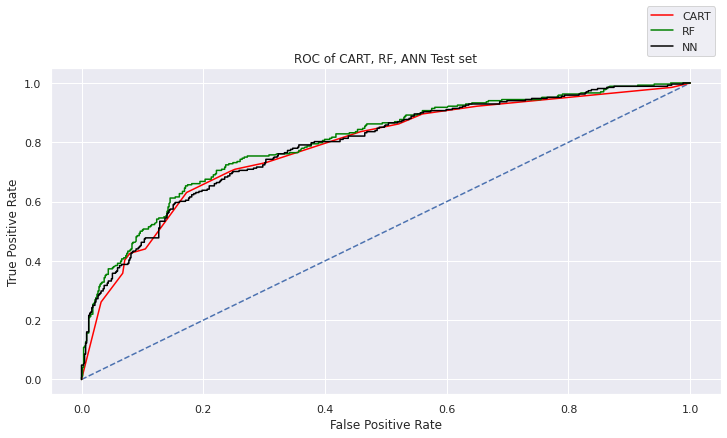

In [316]:
plt.figure(figsize=(12,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of CART, RF, ANN Test set')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

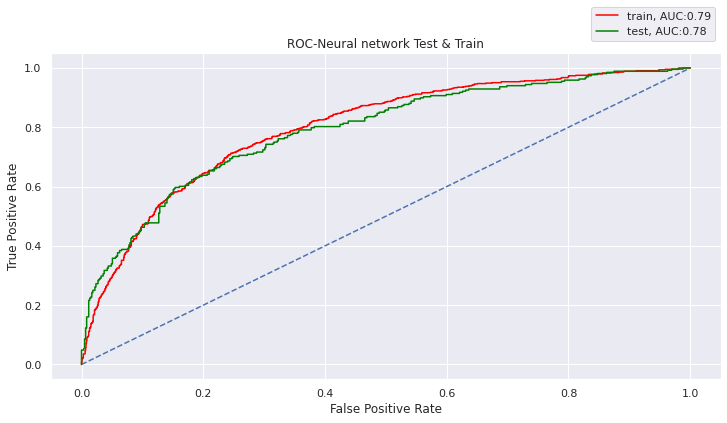

In [317]:
plt.figure(figsize=(12,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nn_train_fpr,nn_train_tpr,color='red',label="train, AUC:0.79")
plt.plot(nn_test_fpr,nn_test_tpr,color='green',label="test, AUC:0.78")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Neural network Test & Train')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()